In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def CalcChebDiffMat(x):
    # Calculating the Chebyshev Differentiation Matrix
    # x: nodes, xj: j =0,1,...,N
    
    N = len(x) - 1
    
    # c: auxiliary constants: c0=cN=2, cj=1 for j=1,...,N-1
    c = np.ones(N+1)
    c[0] = 2
    c[N] = 2
    
    # Initialize the matrix
    D = np.zeros((N+1, N+1))
    # Calculating off-diagonal entries
    for i in range(N+1):
        for j in range(N+1):
            if i!=j:
                D[i,j] = c[i]/c[j] * (-1)**(i+j) / (x[i] - x[j])
    # Diagonal entries, negative sum trick
    for i in range(N+1):
        D[i,i] = -np.sum(D[i,:])
    
    return D

In [3]:
def test_func(x_nodes):
    return np.cos(x_nodes)
def test_func_deri(x_nodes):
    return -np.sin(x_nodes)

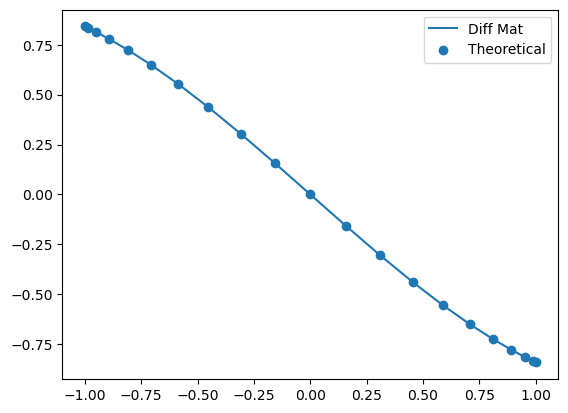

In [20]:
# Testing the interpolation
N = 20
J = np.arange(0, N+1)
x = np.cos(J * np.pi/N)
f = test_func(x)
f_deri = test_func_deri(x)
D = CalcChebDiffMat(x)
f_deri_diffmat = np.dot(D,f)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_deri_diffmat, label='Diff Mat')
ax.scatter(x, f_deri, label='Theoretical')
ax.legend()